In [90]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path = "preprocessed_responses.csv"
df = pd.read_csv(file_path)


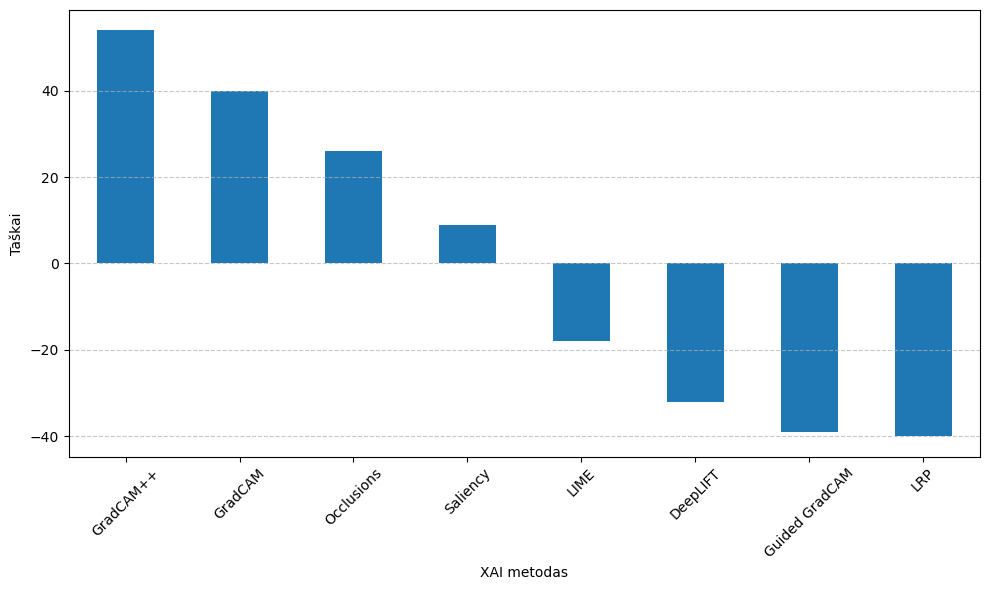

In [92]:
methods = ['DeepLIFT', 'GradCAM', 'GradCAM++', 'Guided GradCAM', 'LIME', 'LRP', 'Occlusions', 'Saliency']

ranking_data = {}
for method in methods:
    best_col = f"{method}_Best_Count"
    worst_col = f"{method}_Worst_Count"
    if best_col in df.columns and worst_col in df.columns:
        total_best = df[best_col].sum()
        total_worst = df[worst_col].sum()
        score = total_best - total_worst
        ranking_data[method] = {
            'Total Best': total_best,
            'Total Worst': total_worst,
            'Taškai': score
        }

ranking_df = pd.DataFrame.from_dict(ranking_data, orient='index').sort_values(by='Taškai', ascending=False)


plt.figure(figsize=(10, 6),)
ranking_df['Taškai'].plot(kind='bar')
plt.xlabel('XAI metodas')
plt.ylabel('Taškai')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Only horizontal gridlines
plt.tight_layout()
plt.show()



In [ ]:
import string 
ATTACK_LABELS = {
    letter: name for letter, name in zip(
        string.ascii_uppercase,
        sorted([
            "adversial-patch",
            "feature-adversaries",
            "fgsm",
            "no-attack",
            "pgd",
            "shadow-attack-nontargeted",
            "square-attack-l2",
            "square-attack-linf"
        ])
    )
}

method_name_mapper = {
    "adversial-patch": "Adversarial Patch",
    "feature-adversaries": "Feature Adversaries",
    "fgsm": "FGSM",
    "pgd": "PGD",
    "shadow-attack-nontargeted": "Shadow Attack",
    "square-attack-l2": "Square Attack (L2)",
    "square-attack-linf": "Square Attack (L∞)",
     "no-attack": "Originalas",
}

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
letter_counts = []

for letter in letters:
    best = df[f'{letter}_Best_Count'].sum() if f'{letter}_Best_Count' in df else 0
    worst = df[f'{letter}_Worst_Count'].sum() if f'{letter}_Worst_Count' in df else 0
    suspicious = df[f'{letter}_MostSuspicious_Count'].sum() if f'{letter}_MostSuspicious_Count' in df else 0
    letter_counts.append({'Attack method': method_name_mapper[ATTACK_LABELS[letter]], 'Parinktas kaip geriausias (kiekis)': best, 'Parinktas kaip blogiausias (kiekis)': worst, 'Parinktas kaip įtartiniausias (kiekis)': suspicious})

letter_df = pd.DataFrame(letter_counts).sort_values(by='Parinktas kaip geriausias (kiekis)', ascending=False)
letter_df.head()

letter_df.to_csv("attacks.csv")